### Importing Necessary Libraries

In [ ]:
# Importing necessary libraries

from pathlib import Path
import pydicom as pydc
import matplotlib.pyplot as plt

In this colab notebook, i'll be working with dicom files.

Here, we will be using the CT images provided by cancer imaging archives. 

The images we got here only contain single slice.

i.e. we will be exploring dicom in 2D setting.

### Reading the DICOM file

In order to read DICOM file, we will be using ***`read_file`*** function provided by `pydicom`.

In [ ]:
# Reading the dicom file.

dicom_file = pydc.read_file('dicom_data/ID_0095_AGE_0071_CONTRAST_0_CT.dcm')

In [ ]:
# Explore dicom header

print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6450.9002.578794045870805618560456155391
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19980313'
(0008, 0013) Instance Creation Time              TM: '141826'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Insta

We can see that the DICOM header consists of device information, patient information, UIDs' and image information.

We can extract information such as the number of pixel rows and columns in an image.

We can obtain the number of rows and columns in identifiers or UID `(0028, 0010)` and `(0028, 0011)` respectively.

But in order to access those attributes from headers, we need to pass them in hexadecimal format as shown below.

In [ ]:
# Get the number of pixel rows

dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

We can also access the number of pixel rows using `Rows` attribute.

In [ ]:
dicom_file.Rows

512

### Getting the Actual image out of dicom file

To get the actual image we will use `pixel_array` attribute.

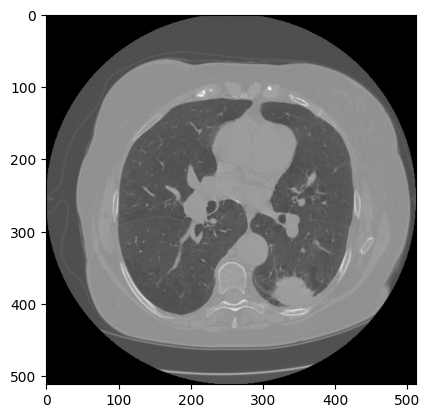

In [ ]:
# Getting the actual image

ct = dicom_file.pixel_array

# Visualize the ct image

plt.figure()
plt.imshow(ct, cmap = "gray")